In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
data_url = 'https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv'
df = pd.read_csv(data_url, index_col=0)

print(df.head())
print(df.info())
df.isnull().sum()

      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB
None


TV           0
radio        0
newspaper    0
sales        0
dtype: int64

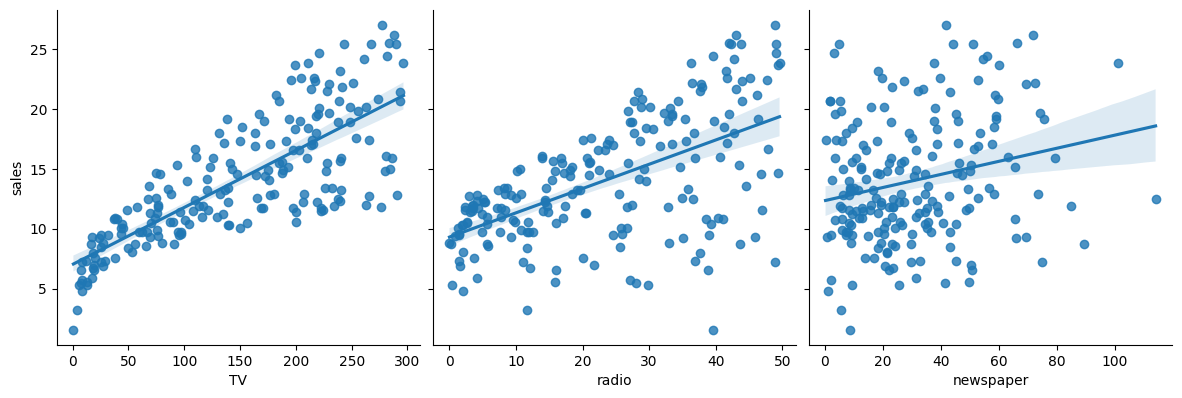

In [13]:
sns.pairplot(
    df,
    x_vars=['TV', 'radio', 'newspaper'],
    y_vars='sales',
    height=4,
    kind='reg'
)
plt.show()

In [15]:
x = df[['TV', 'radio', 'newspaper']]
y = df['sales']

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.25,
    random_state=42
)

print(f'Datos de entrenamiento: {x_train.shape}')
print(f'Datos de prueba: {x_test.shape}')

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Datos de entrenamiento: (150, 3)
Datos de prueba: (50, 3)


In [16]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

print('Primeras predicciones:\n', y_pred[:10])

Primeras predicciones:
 [16.38348211 20.92434957 21.61495426 10.49069997 22.17690456 13.02668085
 21.10309295  7.31813008 13.56732111 15.12238649]


In [17]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

MSE: 2.8800
RMSE: 1.6971
R²: 0.8935


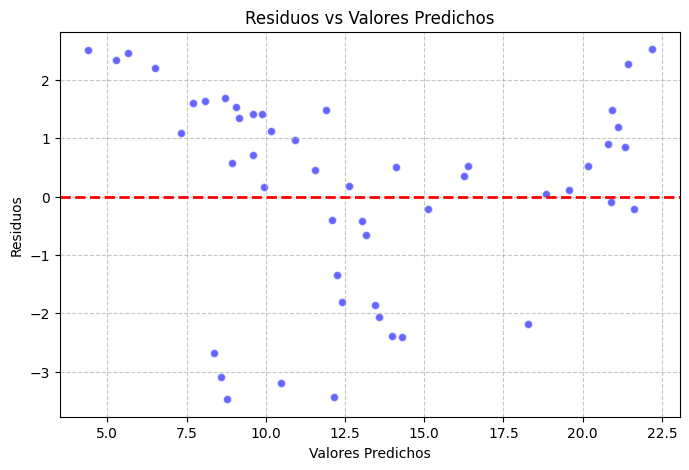

In [19]:
residuos = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.scatter(
    y_pred,
    residuos,
    color='blue',
    alpha=0.6,
    edgecolors='w',
)
plt.axhline(
    y=0,
    color='red',
    linestyle='--',
    linewidth=2
)
plt.title('Residuos vs Valores Predichos')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.grid(
    True,
    linestyle='--',
    alpha=0.7
)
plt.show()